# Changed TD-error

## Original TD-error

$ \delta_t = r_t + \gamma V(s_{t+1}) - V(s_t) $

Based on

$ G_t = \sum_t r_t $

## New TD-error

$ \delta_t = (1 + r_t)*(1  + \gamma V(s_{t+1})) - 1 - V(s_t) $

Based on

$ G_t = \prod_t (1 + r_t) - 1 $

In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/home/olle/PycharmProjects/orderbookrl


In [2]:
from orderbookrl.evaluate.collect_data import load_env_agent, run_through_all_data
import pandas as pd
%matplotlib inline

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/plotly/tools.py:102: UserWarning:

Looks like you don't have 'read-write' permission to your 'home' ('~') directory or to our '~/.plotly' directory. That means plotly's python api can't setup local configuration files. No problem though! You'll just have to sign-in using 'plotly.plotly.sign_in()'. For help with that: 'help(plotly.plotly.sign_in)'.
Questions? Visit https://support.plot.ly



In [3]:
agent_id = 'PPO'
path = 'logs/tests/1/'
checkpoint = 396

env, agent = load_env_agent(agent_id, path, checkpoint)
result, trades, states, actions, rewards, quotes = run_through_all_data(env, agent)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:29405 to respond...


Using custom preprocessor mv


Waiting for redis server at 127.0.0.1:43589 to respond...
Starting local scheduler with the following resources: {'CPU': 4, 'GPU': 1}.

View the web UI at http://localhost:8889/notebooks/ray_ui78559.ipynb?token=047721e1e3df4b3861ef44c4a3863473d7a62a257f2abb15



Created LogSyncer for /home/olle/ray_results/2018-08-27_10-06-56xy7amxcm -> None
Using custom preprocessor mv


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



2018-03-24T20:55:31.240000Z
2018-03-25T06:14:18.675000Z
2018-03-25T15:00:25.827000Z
2018-03-25T22:36:59.485000Z
2018-03-26T08:17:59.912000Z
2018-03-26T14:24:49.992000Z
2018-03-26T19:38:24.395000Z
2018-03-26T23:27:46.518000Z
2018-03-27T04:45:51.179000Z
2018-03-27T11:53:23.576000Z
2018-03-27T20:34:27.903000Z
2018-03-28T04:46:54.774000Z
2018-03-28T14:44:10.426000Z
2018-03-29T00:50:05.882000Z
2018-03-29T07:46:19.974000Z
2018-03-29T13:12:05.964000Z
2018-03-29T18:38:24.804000Z
2018-03-29T22:17:53.845000Z
2018-03-30T01:15:29.495000Z
2018-03-30T05:25:09.310000Z
2018-03-30T08:55:40.905000Z
2018-03-30T12:26:25.392000Z
2018-03-30T16:36:34.066000Z
2018-03-30T21:08:13.399000Z
2018-03-31T02:29:33.574000Z
2018-03-31T10:08:25.018000Z
2018-03-31T16:21:17.981000Z
2018-04-01T01:16:03.931000Z
2018-04-01T10:04:15.684000Z
2018-04-01T16:05:00.946000Z
2018-04-01T19:57:07.353000Z
2018-04-02T03:11:06.256000Z
2018-04-02T12:17:40.228000Z
2018-04-02T20:22:06.520000Z
2018-04-03T05:11:09.405000Z
2018-04-03T13:59:11.

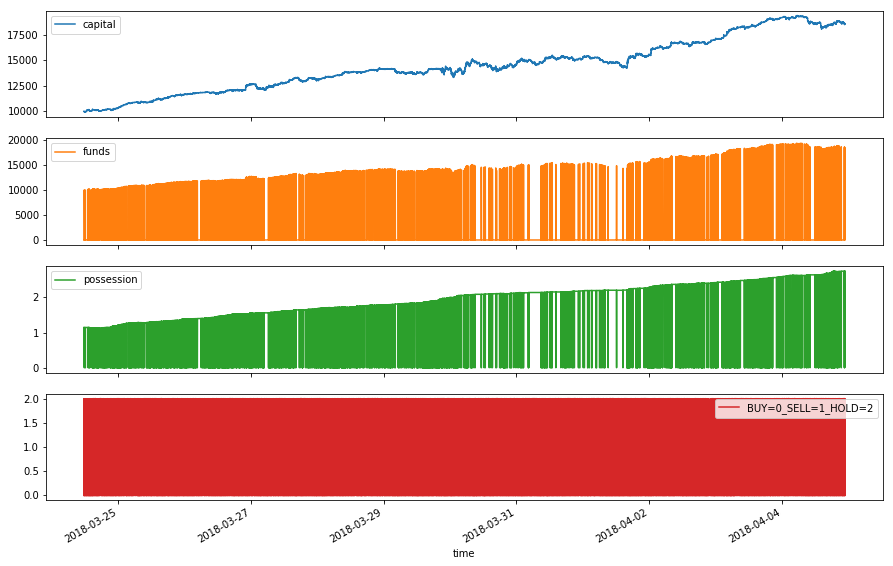

In [4]:
actions.columns = ['BUY=0_SELL=1_HOLD=2']
result.join(actions).plot(subplots=True, figsize=(15,10));

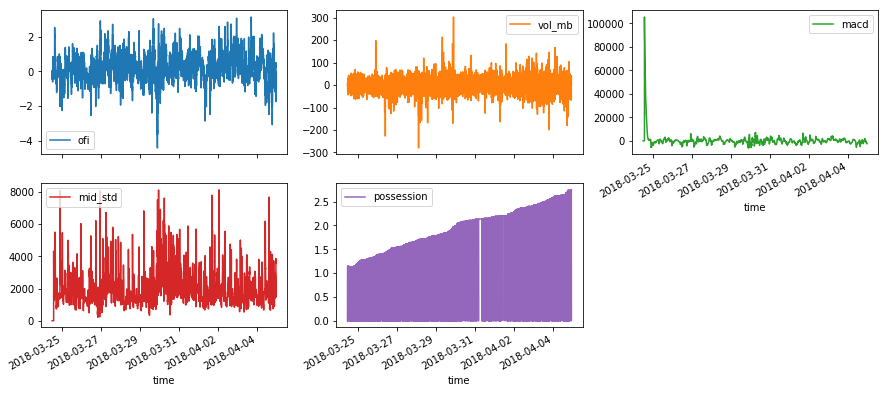

In [5]:
n_cols = 3
layout = (n_cols, 1+ int( (1+states.shape[1])/n_cols))
states.columns = ['ofi', 'vol_mb', 'macd', 'mid_std', 'possession']
states.plot(subplots=True, figsize=(15,10), layout=layout);

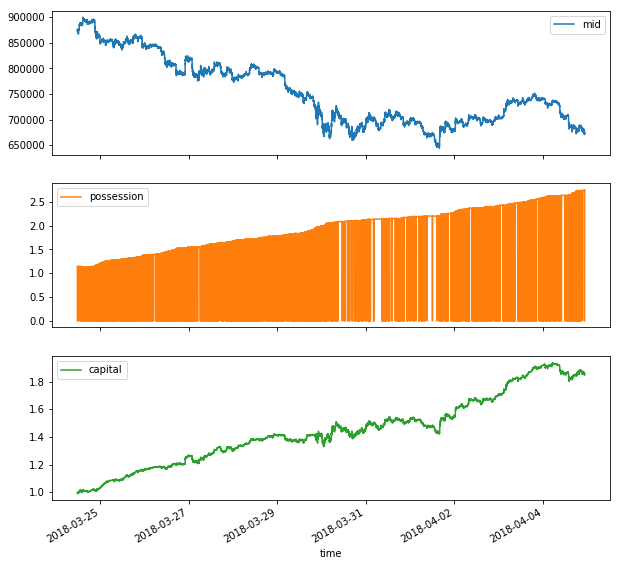

In [6]:
mid = (quotes['ask'] + quotes['bid'])/2
mid.name = 'mid'
temp = mid.to_frame().join(result.possession)
temp = temp.join(result.capital/result.capital[0])
temp.plot(subplots=True, figsize=(10,10));

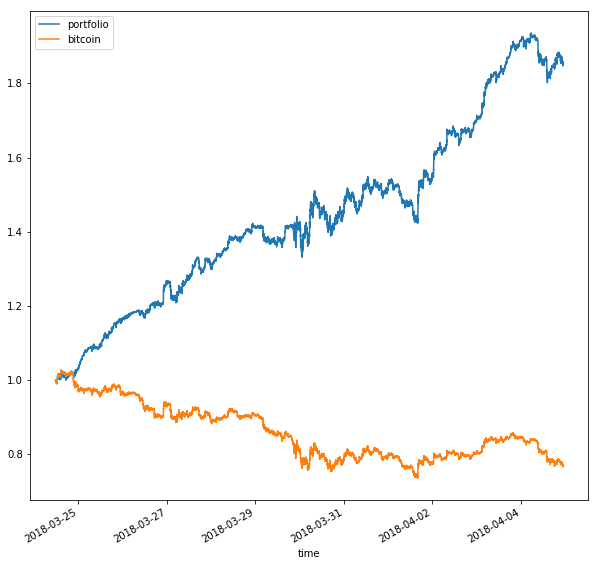

In [7]:
port_returns = result.capital.pct_change().iloc[1:]
port_cum_ret = (1+ port_returns).cumprod()
port_cum_ret.name = 'portfolio'
cum_returns = (1 + mid.pct_change().iloc[1:]).cumprod()
cum_returns.name = 'bitcoin'
temp = pd.concat([port_cum_ret, cum_returns], axis=1)
temp.plot(figsize=(10,10));

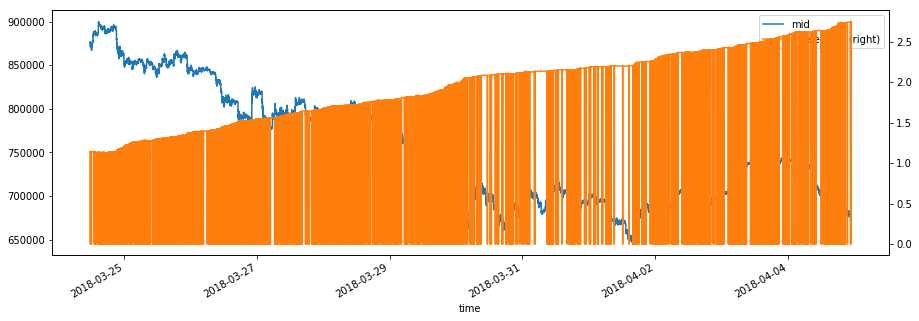

In [8]:
temp = mid.to_frame().join(result.possession)
temp.plot(secondary_y='possession', figsize=(15, 5));

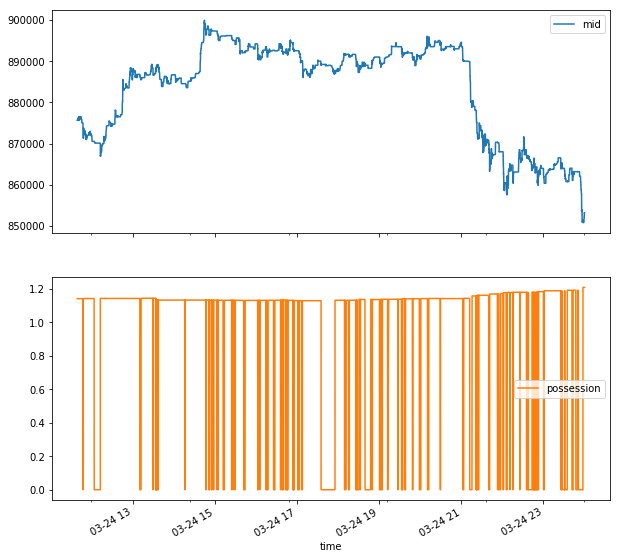

In [14]:
temp['2018-03-24'].plot(subplots=True, figsize=(10,10));